In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats.distributions import uniform, randint
from sklearn.ensemble import VotingClassifier

In [2]:
df = pd.read_csv('data.csv')
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,thalassemia,target
0,52,1,3,125,212,1,0.0,168,0,1.0,0,1.0,0
1,53,1,3,140,203,0,1.0,155,1,3.1,2,1.0,0
2,70,1,3,145,174,1,0.0,125,1,2.6,2,1.0,0
3,61,1,3,148,203,1,0.0,161,0,0.0,0,1.0,0
4,62,0,3,138,294,0,0.0,106,0,1.9,1,0.0,0


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1),
                                                    df['target'],
                                                    test_size=0.20,
                                                    random_state=42)

print('Train:', y_train.size,'Test:', y_test.size)
kfold = StratifiedKFold(n_splits=5, random_state=None)

Train: 820 Test: 205


In [4]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='linear', probability=True))])
param_grid = {
            'preprocessing': [StandardScaler(),],
            'classifier__C': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1, 10, 30, 50, 80, 100]
}
grid_linear_SVM = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_linear_SVM.fit(X_train, y_train)
grid_linear_SVM.best_params_

{'classifier__C': 0.001, 'preprocessing': StandardScaler()}

In [5]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='rbf', probability=True))])

param_grid = {
            'classifier__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1, 10, 30, 50, 80, 100],
            'classifier__C': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1, 10, 30, 50, 80, 100]
}

grid_rbf_SVM = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_rbf_SVM.fit(X_train, y_train)
grid_rbf_SVM.best_params_

{'classifier__C': 50, 'classifier__gamma': 0.1}

In [6]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='poly', probability=True))])
param_grid = {
            'classifier__C': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1, 10, 30, 50, 80, 100]
}
grid_poly_SVM = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_poly_SVM.fit(X_train, y_train)
grid_poly_SVM.best_params_

{'classifier__C': 50}

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression())])
param_grid = {
            'classifier__C': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1, 10, 30, 50, 80, 100],
            'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
}
grid_LR = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_LR.fit(X_train, y_train)
grid_LR.best_params_

{'classifier__C': 0.001, 'classifier__penalty': 'l2'}

In [9]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier())])

param_grid = {
            'classifier__max_depth': [5,10,15,20,25,30, 35, 40],
            'classifier__min_samples_split': [2,3,4,5,10,15,20],
            'classifier__max_leaf_nodes': [3,5,10,15,20,25,30,40, 50, 60]
}

grid_DT = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_DT.fit(X_train, y_train)
grid_DT.best_params_

{'classifier__max_depth': 15,
 'classifier__max_leaf_nodes': 60,
 'classifier__min_samples_split': 3}

In [10]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', BaggingClassifier(
                                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                                    max_samples=100, bootstrap=True, random_state=42))])

param_grid = {'classifier__n_estimators': [50, 100, 200,300, 400],
              'classifier__max_samples': [50, 100, 200, 300, 400],
              'classifier__base_estimator__max_depth':[2, 5, 10, 20, 30]
             }

grid_BDT = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_BDT.fit(X_train, y_train)
grid_BDT.best_params_

{'classifier__base_estimator__max_depth': 10,
 'classifier__max_samples': 400,
 'classifier__n_estimators': 100}

In [11]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(n_estimators=50, max_leaf_nodes=10))])

param_grid = {'classifier__n_estimators': [10, 50, 100, 200, 300],
              'classifier__max_leaf_nodes': [10, 20, 30, 40, 50],
              'classifier__max_depth': [5, 10, 15, 20]
             }

grid_RF = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_RF.fit(X_train, y_train)
grid_RF.best_params_

{'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 50,
 'classifier__n_estimators': 200}

In [12]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16))])

param_grid = {'classifier__n_estimators': [10, 50, 100, 200, 300],
              'classifier__max_leaf_nodes': [10, 20, 30, 40, 50],
              'classifier__max_depth': [5, 10, 15, 20]
             }

grid_ET = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_ET.fit(X_train, y_train)
grid_ET.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 50,
 'classifier__n_estimators': 50}

In [13]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', AdaBoostClassifier(
                                DecisionTreeClassifier(random_state=42),
                                n_estimators=500, learning_rate=0.5, random_state=42))])

param_grid = {'classifier__n_estimators': [50, 100, 200,300,400],
              'classifier__learning_rate': [0.01, 0.05, 0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]
             }

grid_Ada = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_Ada.fit(X_train, y_train)
grid_Ada.best_params_

{'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50}

In [14]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', GradientBoostingClassifier(
                       n_estimators=100, learning_rate=0.5, random_state=42))])


param_grid = {'classifier__n_estimators': [50, 100, 200, 300, 400, 500],
              'classifier__learning_rate': [0.01, 0.05, 0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]
             }

grid_GB = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_GB.fit(X_train, y_train)
grid_GB.best_params_

{'classifier__learning_rate': 0.4, 'classifier__n_estimators': 400}

In [15]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', XGBClassifier(n_jobs=-1))])
grid_XGB = RandomizedSearchCV(n_iter=200, estimator=pipe, cv=kfold, 
                              param_distributions={'classifier__max_depth': randint(2, 20),
                                                   'classifier__learning_rate': uniform(0.001, 0.1),
                                                    'classifier__n_estimators': randint(50, 500),
                                                    'classifier__gamma': uniform(0,3),
                                                    'classifier__colsample_bytree': uniform(0.2, 0.8),
                                                    'classifier__subsample': uniform(0.2, 0.8),
                                                    'classifier__min_child_weight': randint(1, 10)
                                                  },return_train_score=True)

grid_XGB.fit(X_train, y_train)
grid_XGB.best_params_

{'classifier__colsample_bytree': 0.41676631103662026,
 'classifier__gamma': 0.7890454463800439,
 'classifier__learning_rate': 0.078879041237583,
 'classifier__max_depth': 16,
 'classifier__min_child_weight': 1,
 'classifier__n_estimators': 436,
 'classifier__subsample': 0.9637365643518319}

In [16]:
voting_clf = VotingClassifier(estimators=[
                                          ('linear SVM', grid_linear_SVM.best_estimator_),
                                          ('rbf_SVM', grid_rbf_SVM.best_estimator_), 
                                          ('poly SVM', grid_poly_SVM.best_estimator_),       
                                          ('LogisticRegression', grid_LR.best_estimator_),
                                          ('DecisionTree', grid_DT.best_estimator_),
                                          ('BaggingDecisionTree', grid_BDT.best_estimator_),
                                          ('RandomForest', grid_RF.best_estimator_),
                                          ('ExtraTrees', grid_ET.best_estimator_),
                                          ('AdaBoost', grid_Ada.best_estimator_),
                                          ('GradientBoosting', grid_GB.best_estimator_), 
                                          ('XGB', grid_XGB.best_estimator_),
                                          ],voting='soft')
voting_clf.fit(X_train, y_train);


In [23]:
from sklearn import  metrics


models = [('linear SVM', grid_linear_SVM.best_estimator_),
        ('rbf SVM', grid_rbf_SVM.best_estimator_), 
        ('poly SVM', grid_poly_SVM.best_estimator_),       
        ('LogisticRegression', grid_LR.best_estimator_),
        ('DecisionTree', grid_DT.best_estimator_),
        ('BaggingDecisionTree', grid_BDT.best_estimator_),
        ('RandomForest', grid_RF.best_estimator_),
        ('ExtraTrees', grid_ET.best_estimator_),
        ('AdaBoost', grid_Ada.best_estimator_),
        ('GradientBoosting', grid_GB.best_estimator_), 
        ('XGB', grid_XGB.best_estimator_),
        ('Voting',  voting_clf)]

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    y_pred = model.predict(X_test)
    precision_score.append(metrics.precision_score(y_test, y_pred))
    recall_score.append(metrics.recall_score(y_test, y_pred))
    f1_score.append( metrics.f1_score(y_test, y_pred))
    accuracy_score.append(metrics.accuracy_score(y_test, y_pred))
res_labels = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
    }
res_df = pd.DataFrame(data=res_labels)
res_df.insert(loc=0, column='Method', value=[model[0] for model in models])
def highlight_max(s):
    is_large, is_max = s.nlargest(4).values, s.nlargest(1).values
    
    return ['color: lightgreen' if v in is_max else 'color: green' if v in is_large else '' for v in s]

res_df.style.apply(highlight_max, subset=['precision_score',	'recall_score',	'f1_score','accuracy_score'])

,Method,precision_score,recall_score,f1_score,accuracy_score
0,linear SVM,0.745902,0.883495,0.808889,0.790244
1,rbf SVM,1.000000,0.970874,0.985222,0.985366
2,poly SVM,1.000000,0.941748,0.970000,0.970732
3,LogisticRegression,0.735537,0.864078,0.794643,0.775610
4,DecisionTree,1.000000,0.970874,0.985222,0.985366
5,BaggingDecisionTree,0.944954,1.000000,0.971698,0.970732
6,RandomForest,0.927273,0.990291,0.957746,0.956098
7,ExtraTrees,0.884956,0.970874,0.925926,0.921951
8,AdaBoost,1.000000,0.970874,0.985222,0.985366
9,GradientBoosting,1.000000,1.000000,1.000000,1.000000


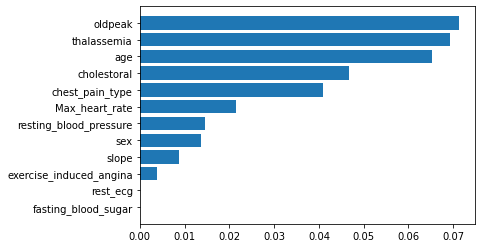

In [18]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(grid_GB.best_estimator_, X_test, y_test)
feature_names = df.columns
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.show()


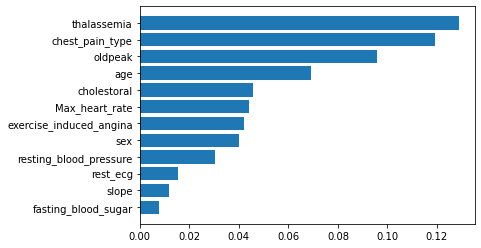

In [21]:
perm_importance = permutation_importance(voting_clf, X_test, y_test)
feature_names = df.columns
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.show()